# Convergence Metrics

- (1) Import and loading the model 
- (2) Convergence Metrics Overijssel
- (3) Convergence Metrics Gelderland

### (1) Import and loading the model

In [14]:
# Import general python packages
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

import seaborn as sns

# Import functions
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation
from problem_formulation import sum_over,time_step_0,time_step_1

# Loading in the necessary modules for EMA workbench and functions
from ema_workbench import (Model, Scenario, Constraint, ScalarOutcome)
from ema_workbench.util import ema_logging
from ema_workbench.em_framework.optimization import ArchiveLogger, EpsilonProgress
from ema_workbench import save_results, load_results
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import parcoords

In [17]:

def initialize_model():
    ema_logging.log_to_stderr(ema_logging.INFO)
    print("Initializing model...")
    dike_model, planning_steps = get_model_for_problem_formulation(7)
    print("Model initialized.")
    return dike_model, planning_steps

# Writing a function to create actor specific problem formulations
def problem_formulation_actor(problem_formulation_actor, uncertainties, levers):
    # Load the model:
    function = DikeNetwork()
    # workbench model:
    model = Model('dikesnet', function=function)
    # Outcomes are all costs, thus they have to minimized:
    direction = ScalarOutcome.MINIMIZE

    model.uncertainties = uncertainties
    model.levers = levers

    cost_variables = []
    cost_variables.extend(
    [
        f"{dike}_{e}"
        for e in ["Expected Annual Damage", "Dike Investment Costs"]
        for dike in function.dikelist
    ])
    cost_variables.extend([f"RfR Total Costs"])
    cost_variables.extend([f"Expected Evacuation Costs"])

    if problem_formulation_actor == 6:  # GELDERLAND
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome(f'Total_period_Costs_0',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_0, kind=direction),
            ScalarOutcome(f'Total_period_Costs_1',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_1, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_2',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_2, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_3',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_3, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_4',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_4, kind=direction),
            ScalarOutcome('Expected Annual Damage A1_', variable_name='A.1_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A2_', variable_name='A.2_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A3_', variable_name='A.3_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Total Costs', variable_name=cost_variables, function=sum_over, kind=direction),
            ScalarOutcome("Expected Number of Deaths_", variable_name=
            [f"{dike}_Expected Number of Deaths" for dike in function.dikelist], function=sum_over, kind=direction)]


    elif problem_formulation_actor == 7:  # OVERIJSSEL
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome(f'Total_period_Costs_0',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_0, kind=direction),
            ScalarOutcome(f'Total_period_Costs_1',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_1, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_2',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_2, kind=direction),
            # # ScalarOutcome(f'Total_period_Costs_3',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_3, kind=direction),
            # # ScalarOutcome(f'Total_period_Costs_4',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_4, kind=direction),
            ScalarOutcome('Expected Annual Damage A4_', variable_name='A.4_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A5_', variable_name='A.5_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Total Costs', variable_name=cost_variables, function=sum_over, kind=direction),
            ScalarOutcome("Expected Number of Deaths_", variable_name=
            [f"{dike}_Expected Number of Deaths" for dike in function.dikelist], function=sum_over, kind=direction)]

    else:
        raise TypeError('unknown identifier')
    return model

### Overijssel
if __name__ == '__main__':
    dike_model, planning_steps = initialize_model()

    uncertainties = dike_model.uncertainties
    levers = dike_model.levers
    
    model = problem_formulation_actor(6, uncertainties, levers)

    # Deepcopying the uncertainties and levers
    uncertainties = copy.deepcopy(dike_model.uncertainties)
    levers = copy.deepcopy(dike_model.levers)

    # Running the optimization for Overijssel
    function = DikeNetwork()

Initializing model...
Model initialized.


### (1) Convergence Metrics Overijssel

### (2) Convergence Metrics Gelderland

In [3]:
convergencee = pd.read_csv('Gelderland_Multi_MORDM_epsilonn.csv')

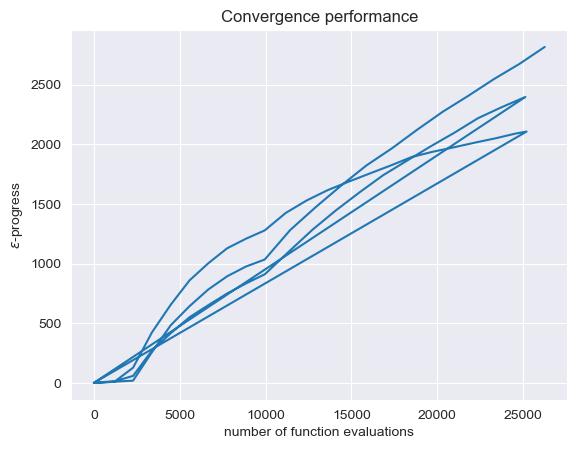

<Figure size 640x480 with 0 Axes>

In [4]:
plt.plot(convergencee.nfe, convergencee.epsilon_progress)

plt.ylabel('$\epsilon$-progress')
plt.xlabel('number of function evaluations')
plt.title('Convergence performance')
plt.show()
#plt.savefig('./figures/Convergence Performance Gelderland.png')

In [11]:
all_archives = []

for i in range(2):
    archives = ArchiveLogger.load_archives(f"./archives/{i}.tar.gz")
    all_archives.append(archives)

In [22]:
from ema_workbench import (
    HypervolumeMetric,
    GenerationalDistanceMetric,
    EpsilonIndicatorMetric,
    InvertedGenerationalDistanceMetric,
    SpacingMetric
)
from ema_workbench.em_framework.optimization import to_problem
from ema_workbench.em_framework.optimization import epsilon_nondominated

problem = to_problem(model, searchover="levers")
outcomes = pd.read_csv('Gelderland_Multi_MORDM_outcomes.csv')
results = list(outcomes.loc[:, [o.name for o in model.outcomes]])
reference_set = epsilon_nondominated(results, [1] * len(model.outcomes), problem)

hv = HypervolumeMetric(reference_set, problem)
gd = GenerationalDistanceMetric(reference_set, problem, d=1)
ei = EpsilonIndicatorMetric(reference_set, problem)
ig = InvertedGenerationalDistanceMetric(reference_set, problem, d=1)
sm = SpacingMetric(problem)


metrics_by_seed = []
for archives in all_archives:
    metrics = []
    for nfe, archive in archives.items():
        scores = {
            "generational_distance": gd.calculate(archive),
            "hypervolume": hv.calculate(archive),
            "epsilon_indicator": ei.calculate(archive),
            "inverted_gd": ig.calculate(archive),
            "spacing": sm.calculate(archive),
            "nfe": int(nfe),
        }
        metrics.append(scores)
    metrics = pd.DataFrame.from_dict(metrics)

    # sort metrics by number of function evaluations
    metrics.sort_values(by="nfe", inplace=True)
    metrics_by_seed.append(metrics)

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid